# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
image = imread('data/imagen_clase.JPG')

In [3]:
image.shape

(795, 1442, 3)

Muestra la imagen para ver que se ha cargado bien

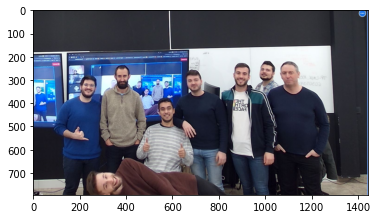

In [4]:
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [10]:
795*1442

1146390

In [5]:
X = image.reshape(-1,3)
X.shape

(1146390, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [6]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=10).fit(X)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [12]:
kmeans.labels_

array([3, 3, 3, ..., 2, 4, 4])

In [13]:
kmeans.cluster_centers_

array([[ 22.48752829,  22.29837307,  34.17569006],
       [219.97470617, 228.28112159, 233.09257882],
       [156.14703482, 141.3208003 , 138.44308643],
       [ 49.44560586,  49.84587439,  62.03035723],
       [ 53.87851068,  99.34921856, 169.57214219]])

In [7]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [15]:
segmented_img.shape

(1146390, 3)

In [19]:
X

array([[ 47,  48,  52],
       [ 47,  48,  52],
       [ 47,  48,  52],
       ...,
       [130, 152, 209],
       [112, 155, 234],
       [102, 157, 247]], dtype=uint8)

In [18]:
segmented_img

array([[[ 49.44560586,  49.84587439,  62.03035723],
        [ 49.44560586,  49.84587439,  62.03035723],
        [ 49.44560586,  49.84587439,  62.03035723],
        ...,
        [156.14703482, 141.3208003 , 138.44308643],
        [ 53.87851068,  99.34921856, 169.57214219],
        [ 53.87851068,  99.34921856, 169.57214219]],

       [[ 49.44560586,  49.84587439,  62.03035723],
        [ 49.44560586,  49.84587439,  62.03035723],
        [ 49.44560586,  49.84587439,  62.03035723],
        ...,
        [156.14703482, 141.3208003 , 138.44308643],
        [ 53.87851068,  99.34921856, 169.57214219],
        [ 53.87851068,  99.34921856, 169.57214219]],

       [[ 49.44560586,  49.84587439,  62.03035723],
        [ 49.44560586,  49.84587439,  62.03035723],
        [ 49.44560586,  49.84587439,  62.03035723],
        ...,
        [156.14703482, 141.3208003 , 138.44308643],
        [ 53.87851068,  99.34921856, 169.57214219],
        [ 53.87851068,  99.34921856, 169.57214219]],

       ...,

      

In [21]:
segmented_img.astype('uint8')

array([[[ 49,  49,  62],
        [ 49,  49,  62],
        [ 49,  49,  62],
        ...,
        [156, 141, 138],
        [ 53,  99, 169],
        [ 53,  99, 169]],

       [[ 49,  49,  62],
        [ 49,  49,  62],
        [ 49,  49,  62],
        ...,
        [156, 141, 138],
        [ 53,  99, 169],
        [ 53,  99, 169]],

       [[ 49,  49,  62],
        [ 49,  49,  62],
        [ 49,  49,  62],
        ...,
        [156, 141, 138],
        [ 53,  99, 169],
        [ 53,  99, 169]],

       ...,

       [[219, 228, 233],
        [219, 228, 233],
        [219, 228, 233],
        ...,
        [156, 141, 138],
        [ 53,  99, 169],
        [ 53,  99, 169]],

       [[219, 228, 233],
        [219, 228, 233],
        [219, 228, 233],
        ...,
        [156, 141, 138],
        [ 53,  99, 169],
        [ 53,  99, 169]],

       [[219, 228, 233],
        [219, 228, 233],
        [219, 228, 233],
        ...,
        [156, 141, 138],
        [ 53,  99, 169],
        [ 53,  99, 169]]

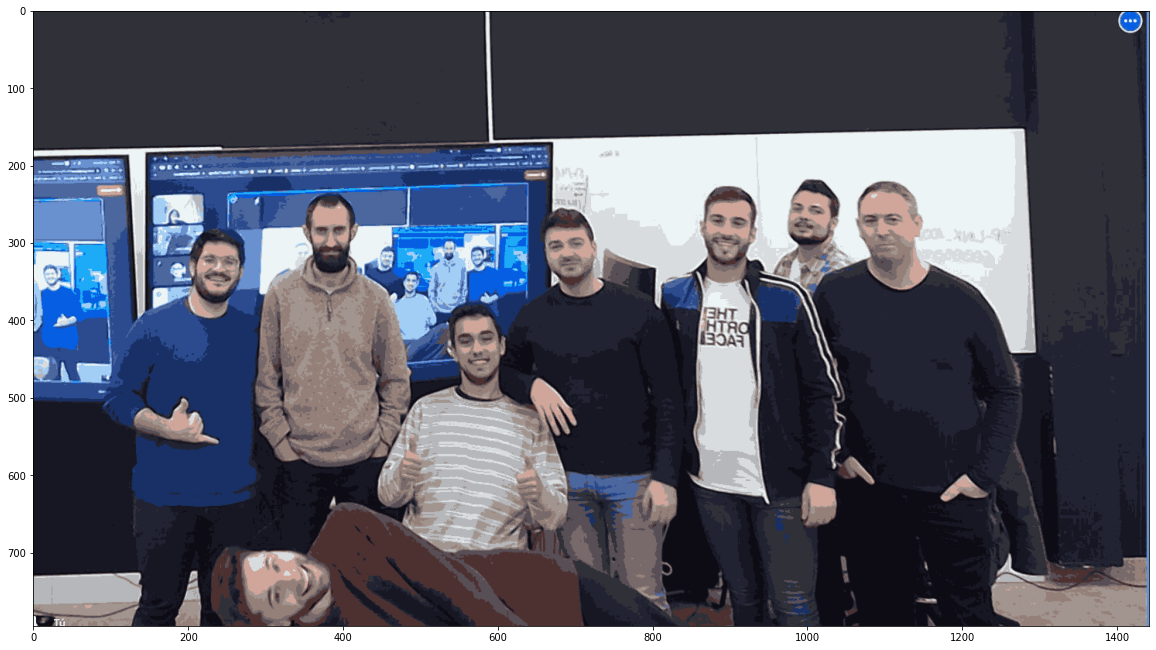

In [9]:
segmented_img = segmented_img.reshape(image.shape)

fig = plt.figure(figsize=(20,20))
plt.imshow(segmented_img.astype('uint8'));

#### 7. Imprime y guarda en tu ordenador la imagen resultante

In [10]:
fig.savefig('data/mi_imagen_cluster.jpg')

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [11]:
def cluster_colors(image_path, n_colors, save=False, show=True):
    image = imread(image_path)
    X = image.reshape(-1,3)

    kmeans = KMeans(n_clusters=n_colors).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)

    if show:
        plt.imshow(segmented_img.astype('uint8'))
    
    if save:
        fig.savefig('mi_imagen.jpg')
    

In [ ]:
# for image in image_folder:
#     cluster_colors(image)

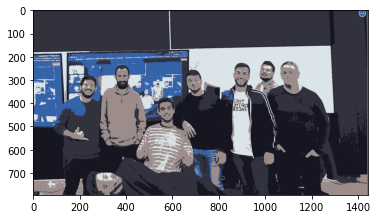

In [12]:
cluster_colors('data/imagen_clase.JPG', 5)